In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [ ]:
df = pd.read_csv("/content/covtype.csv")
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
y_train_oh = to_categorical(y_train - 1)
y_test_oh  = to_categorical(y_test - 1)


In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train_oh,
    validation_split=0.1,
    epochs=40,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.6495 - loss: 1.0094 - val_accuracy: 0.7609 - val_loss: 0.5628
Epoch 2/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7459 - loss: 0.6018 - val_accuracy: 0.7912 - val_loss: 0.5013
Epoch 3/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7644 - loss: 0.5508 - val_accuracy: 0.8047 - val_loss: 0.4622
Epoch 4/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7801 - loss: 0.5181 - val_accuracy: 0.8163 - val_loss: 0.4369
Epoch 5/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7906 - loss: 0.4939 - val_accuracy: 0.8285 - val_loss: 0.4144
Epoch 6/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7992 - loss: 0.4740 - val_accuracy: 0.8341 - val_loss: 0.3978
Epoch 7/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8065 - loss: 0.4577 - val_accuracy: 0.8417 - val_loss: 0.3794
Epoch 8/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8126 - loss: 0.4463 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_oh, verbose=0)
print("Final Neural Network Test Accuracy:", test_acc)




Final Neural Network Test Accuracy: 0.8928857445716858


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/covtype.csv")

print("Shape:", df.shape)
df.head()



Shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.isnull().sum()


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


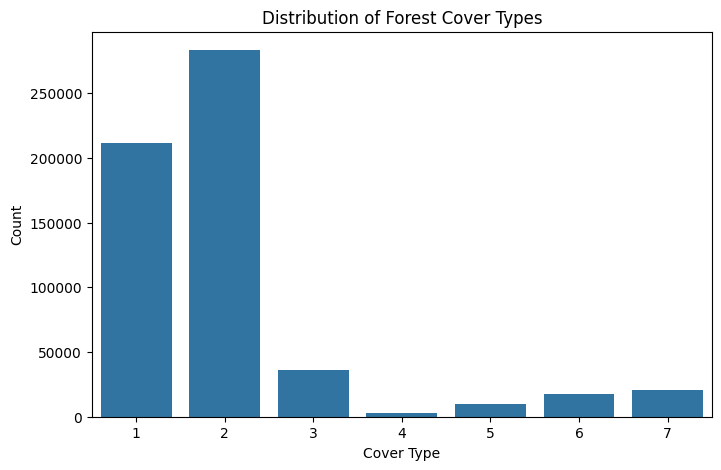

,proportion
Cover_Type,
2,0.487599
1,0.364605
3,0.061537
7,0.035300
6,0.029891
5,0.016339
4,0.004728


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cover_Type'])
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

df['Cover_Type'].value_counts(normalize=True)


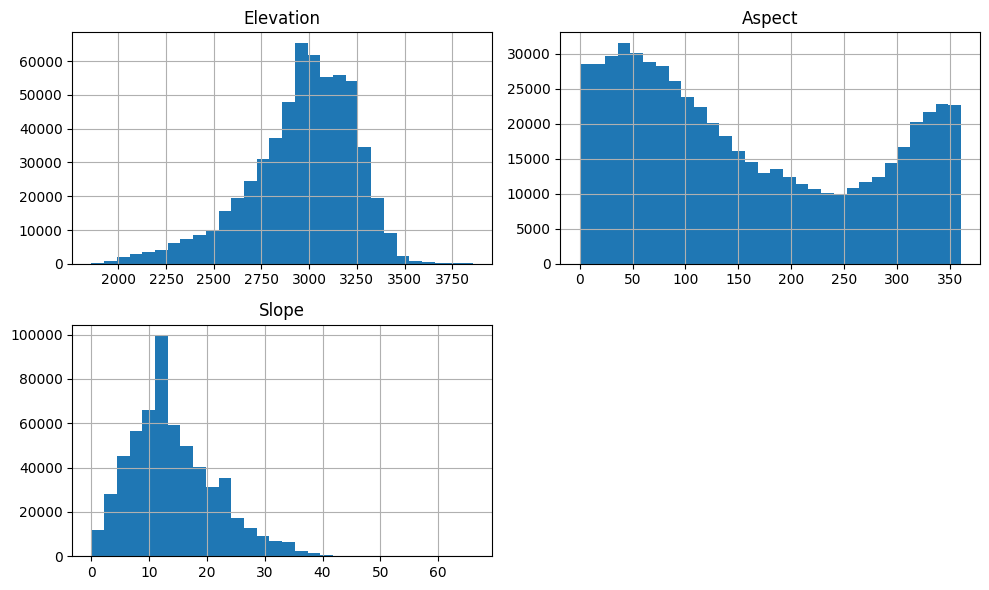

In [ ]:
num_cols = ['Elevation', 'Aspect', 'Slope']

df[num_cols].hist(figsize=(10,6), bins=30)
plt.tight_layout()
plt.show()


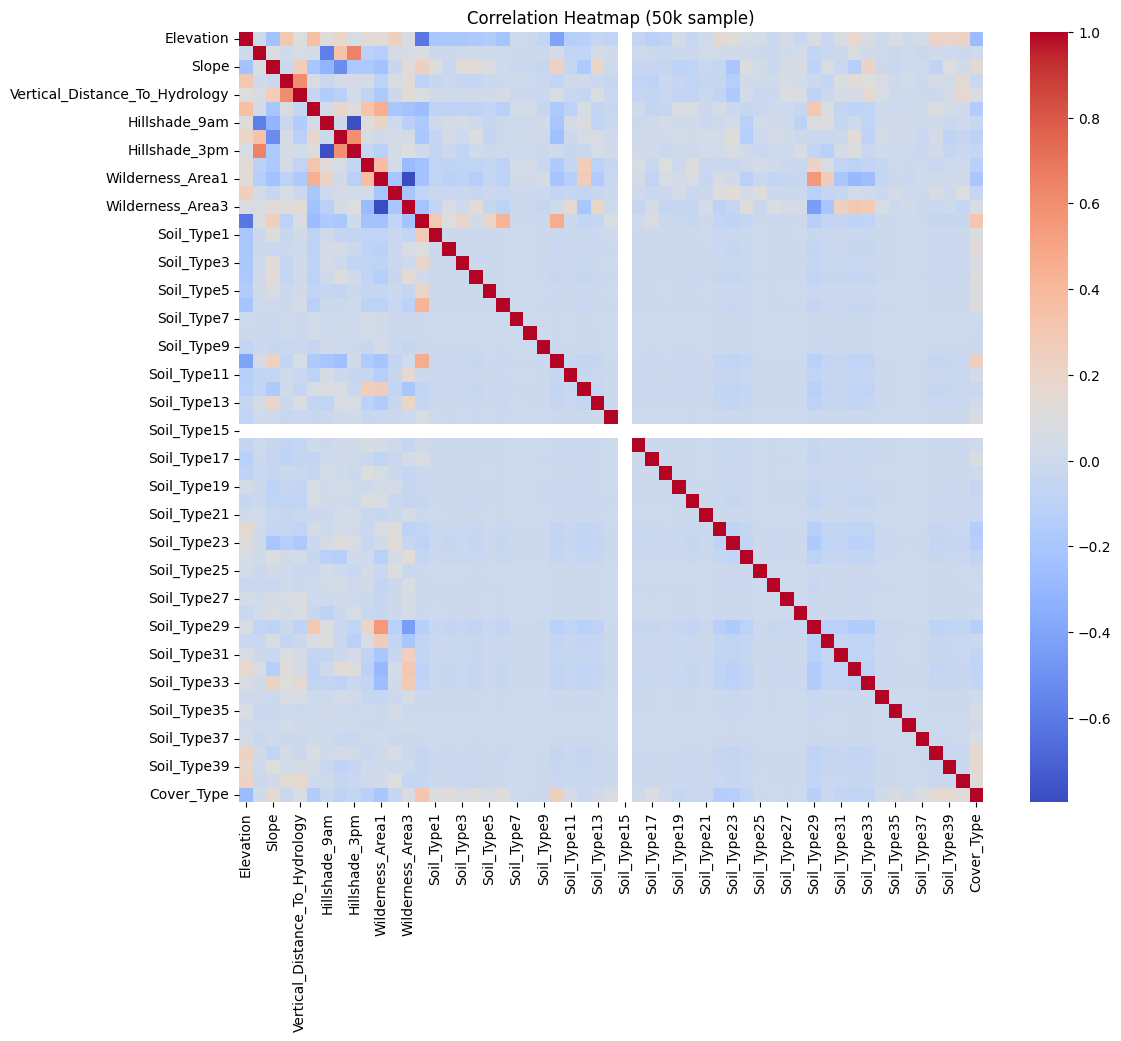

In [ ]:
sample_df = df.sample(50000, random_state=42)
plt.figure(figsize=(12,10))
sns.heatmap(sample_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (50k sample)")
plt.show()


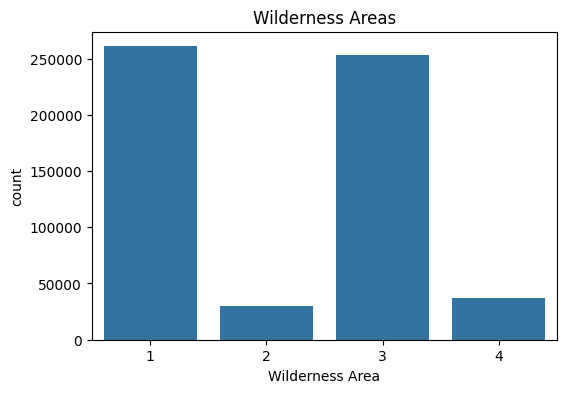

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Wilderness_Area1']
             + df['Wilderness_Area2']*2
             + df['Wilderness_Area3']*3
             + df['Wilderness_Area4']*4)
plt.title("Wilderness Areas")
plt.xlabel("Wilderness Area")
plt.show()


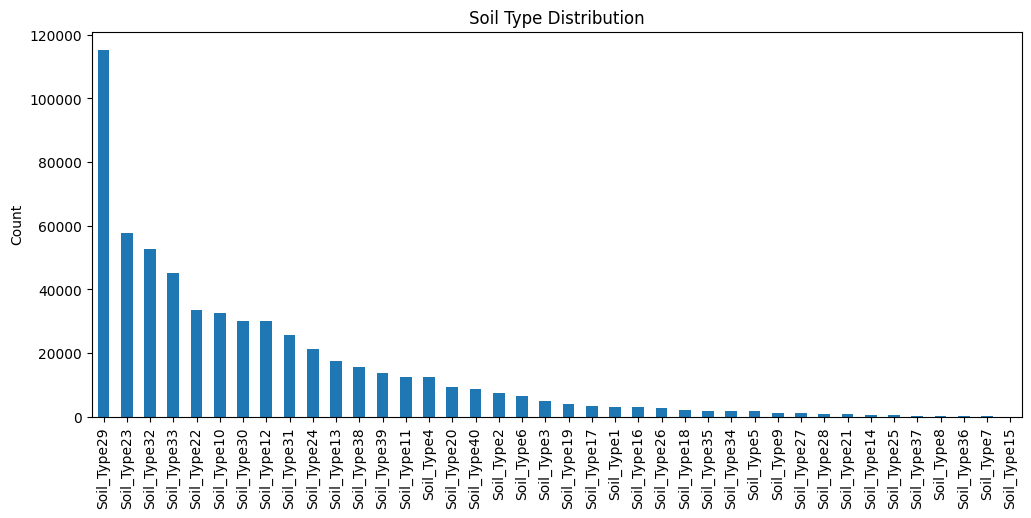

In [ ]:
soil_cols = [col for col in df.columns if "Soil_Type" in col]

soil_counts = df[soil_cols].idxmax(axis=1).value_counts()

plt.figure(figsize=(12,5))
soil_counts.plot(kind='bar')
plt.title("Soil Type Distribution")
plt.ylabel("Count")
plt.show()


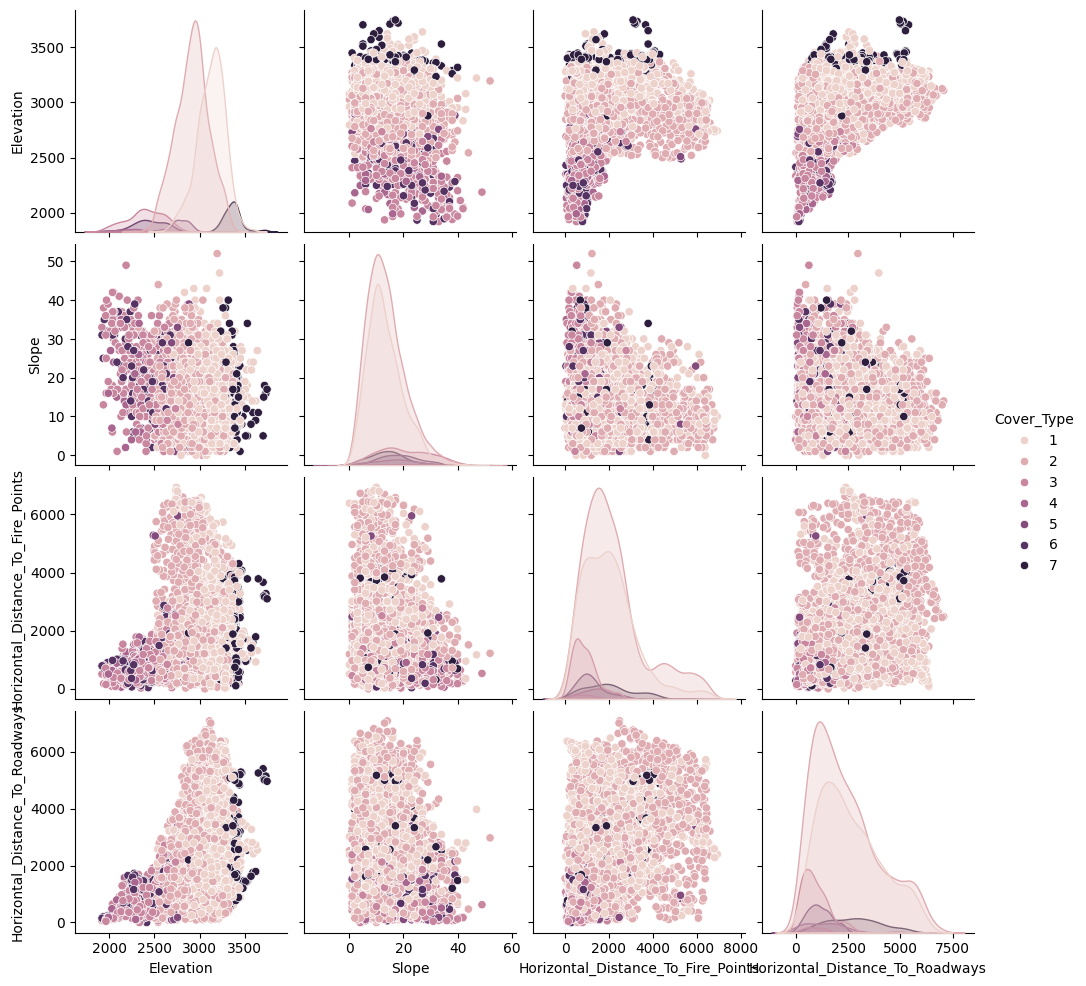

In [ ]:
sample = df.sample(5000, random_state=42)

sns.pairplot(sample[['Elevation', 'Slope', 'Horizontal_Distance_To_Fire_Points',
                     'Horizontal_Distance_To_Roadways', 'Cover_Type']],
             hue='Cover_Type')
plt.show()


In [ ]:
corr_with_target = sample_df.corr()['Cover_Type'].sort_values(ascending=False)
corr_with_target


,Cover_Type
Cover_Type,1.000000
Wilderness_Area4,0.318702
Soil_Type10,0.236918
Soil_Type38,0.164963
Soil_Type39,0.158471
Slope,0.144955
Soil_Type2,0.126101
Soil_Type40,0.114559
Soil_Type6,0.112185
Soil_Type4,0.102470


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,647 (666.59 KB)

 Trainable params: 56,583 (221.03 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 113,168 (442.07 KB)

In [ ]:
opt = model.optimizer
print("Optimizer:", type(opt).__name__)
print("Learning rate:", opt.learning_rate.numpy())


Optimizer: Adam
Learning rate: 0.001


In [ ]:
if type(opt).__name__ == "Adam":
   print("Beta_1:", opt.beta_1)
print("Beta_2:", opt.beta_2)
print("Epsilon:", opt.epsilon)

print("Loss function:", model.loss)
print("Metrics:", model.metrics_names)
history = model.fit(...)
print("Epochs trained:", len(history.history["loss"]))
print("Final training loss:", history.history["loss"][-1])
print("Final validation loss:", history.history["val_loss"][-1])
print("Final validation accuracy:", history.history["val_accuracy"][-1])


Beta_1: 0.9
Beta_2: 0.999
Epsilon: 1e-07
Loss function: categorical_crossentropy
Metrics: ['loss', 'compile_metrics']


ValueError: Unrecognized data type: x=Ellipsis (of type <class 'ellipsis'>)